In [76]:
import pandas as pd

# Cargar el archivo
file_path = 'kinship_prunned.kin0'
kinship = pd.read_csv(file_path, delim_whitespace=True)

# Mostrar las primeras filas del archivo para entender su estructura
kinship.head()


,#FID1,IID1,FID2,IID2,NSNP,HETHET,IBS0,KINSHIP
0,0,GSO-129-b,0,GSO-68-a,21622,0.142494,0.049625,0.014506
1,0,GSO-43-c,0,GSO-68-a,21627,0.114163,0.075415,-0.098289
2,0,GSO-43-c,0,GSO-129-b,21601,0.137633,0.072960,-0.025469
3,0,GSO-14-d,0,GSO-68-a,21618,0.105375,0.101304,-0.157377
4,0,GSO-14-d,0,GSO-129-b,21592,0.136764,0.047749,0.011449


In [77]:
# Filtrar kinship para mantener solo las filas donde 'NSNP' es mayor o igual a 20000
kinship = kinship[kinship['NSNP'] >= 20000]

In [78]:
# Función para modificar los valores de IID1 e IID2
def modificar_id(id_value):
    # Dividir el string por el guion y quedarse con la parte "GSO-numero"
    return id_value.split('-')[0] + '-' + id_value.split('-')[1]

# Aplicar la función a las columnas IID1 e IID2
kinship['IID1'] = kinship['IID1'].apply(modificar_id)
kinship['IID2'] = kinship['IID2'].apply(modificar_id)

# Mostrar las primeras filas del archivo modificado para verificar los cambios
kinship.head()

,#FID1,IID1,FID2,IID2,NSNP,HETHET,IBS0,KINSHIP
0,0,GSO-129,0,GSO-68,21622,0.142494,0.049625,0.014506
1,0,GSO-43,0,GSO-68,21627,0.114163,0.075415,-0.098289
2,0,GSO-43,0,GSO-129,21601,0.137633,0.072960,-0.025469
3,0,GSO-14,0,GSO-68,21618,0.105375,0.101304,-0.157377
4,0,GSO-14,0,GSO-129,21592,0.136764,0.047749,0.011449


In [79]:
kinship = kinship.sort_values('KINSHIP', ascending=False)
kinship.head(25)

,#FID1,IID1,FID2,IID2,NSNP,HETHET,IBS0,KINSHIP
1611,0,GSO-13,0,GSO-34,21666,0.174790,0.015739,0.207924
687,0,GSO-25,0,GSO-84,21695,0.187002,0.016686,0.206129
211,0,GSO-84,0,GSO-129,21658,0.179934,0.013298,0.201571
631,0,GSO-112,0,GSO-129,21273,0.190758,0.020213,0.198164
5065,0,GSO-90,0,GSO-34,21658,0.158048,0.013990,0.194675
89,0,GSO-105,0,GSO-79,21611,0.166489,0.017399,0.193747
1486,0,GSO-75,0,GSO-129,21607,0.175082,0.016245,0.186451
1885,0,GSO-29,0,GSO-75,21637,0.173407,0.019226,0.185179
4118,0,GSO-71,0,GSO-70,21679,0.173347,0.020942,0.179882
2795,0,GSO-104,0,GSO-33,21576,0.164766,0.018122,0.177554


In [80]:
# Paso 1: Crear columnas auxiliares que contienen los pares ordenados
kinship['PAIR'] = kinship.apply(lambda row: '-'.join(sorted([row['IID1'], row['IID2']])), axis=1)
IBD['PAIR'] = IBD.apply(lambda row: '-'.join(sorted([row['IID1'], row['IID2']])), axis=1)

# Paso 2: Filtrar IBD para mantener solo las filas cuyo par ordenado también está en kinship
kinship_pairs = kinship['PAIR'].unique()
filtered_IBD = IBD[IBD['PAIR'].isin(kinship_pairs)]

# Eliminar la columna auxiliar 'PAIR'
#filtered_IBD = filtered_IBD.drop(columns=['PAIR'])
filtered_IBD

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,PAIR
0,0,GSO-68,0,GSO-129,OT,0,0.7268,0.2303,0.0429,0.1581,-1,0.749329,0.7081,2.7500,GSO-129-GSO-68
1,0,GSO-68,0,GSO-43,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.705160,0.0502,0.8750,GSO-43-GSO-68
2,0,GSO-68,0,GSO-14,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.694861,0.0502,0.8750,GSO-14-GSO-68
3,0,GSO-68,0,GSO-51,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.684732,0.1367,1.1429,GSO-51-GSO-68
4,0,GSO-68,0,GSO-85,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.676205,0.9498,6.5000,GSO-68-GSO-85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0,GSO-66,0,GSO-99,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.673518,0.9498,6.5000,GSO-66-GSO-99
5453,0,GSO-66,0,GSO-102,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.673319,0.1367,1.1429,GSO-102-GSO-66
5454,0,GSO-90,0,GSO-99,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.702324,0.9858,14.0000,GSO-90-GSO-99
5456,0,GSO-90,0,GSO-102,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.709997,0.7081,2.7500,GSO-102-GSO-90


In [81]:

# Aplicar la función a las columnas IID1 e IID2
IBD['IID1'] = IBD['IID1'].apply(modificar_id)
IBD['IID2'] = IBD['IID2'].apply(modificar_id)


# Mostrar las primeras filas del archivo para entender su estructura
IBD.head()


,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,PAIR
0,0,GSO-68,0,GSO-129,OT,0,0.7268,0.2303,0.0429,0.1581,-1,0.749329,0.7081,2.7500,GSO-129-GSO-68
1,0,GSO-68,0,GSO-43,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.705160,0.0502,0.8750,GSO-43-GSO-68
2,0,GSO-68,0,GSO-14,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.694861,0.0502,0.8750,GSO-14-GSO-68
3,0,GSO-68,0,GSO-51,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.684732,0.1367,1.1429,GSO-51-GSO-68
4,0,GSO-68,0,GSO-85,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.676205,0.9498,6.5000,GSO-68-GSO-85


In [85]:
# Definir la lista de pares
pairs = [('GSO-13', 'GSO-34'), ('GSO-25', 'GSO-84'), ('GSO-84', 'GSO-129'), ('GSO-112', 'GSO-129'), 
         ('GSO-90', 'GSO-34'), ('GSO-105', 'GSO-79'), ('GSO-75', 'GSO-129'), ('GSO-29', 'GSO-75'), 
         ('GSO-71', 'GSO-70'), ('GSO-104', 'GSO-33')]

# Inicializar un dataframe vacío para almacenar los resultados
filtered_IBD = pd.DataFrame()

# Buscar cada par en IBD y agregar los resultados a filtered_IBD
for iid1, iid2 in pairs:
    pair_in_IBD = IBD[((IBD['IID1'] == iid1) & (IBD['IID2'] == iid2)) | ((IBD['IID1'] == iid2) & (IBD['IID2'] == iid1))]
    filtered_IBD = pd.concat([filtered_IBD, pair_in_IBD])

In [86]:
# Ordenar filtered_IBD por 'Z1' en orden descendente
filtered_IBD_sorted = filtered_IBD.sort_values(by='Z1', ascending=False)
filtered_IBD_sorted

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,PAIR
123,0,GSO-129,0,GSO-84,OT,0,0.1891,0.8109,0.0000,0.4054,-1,0.794926,0.9498,6.5,GSO-129-GSO-84
157,0,GSO-129,0,GSO-75,OT,0,0.2283,0.7717,0.0000,0.3858,-1,0.788009,0.9498,6.5,GSO-129-GSO-75
4240,0,GSO-75,0,GSO-29,OT,0,0.2816,0.7156,0.0028,0.3606,-1,0.791168,0.9498,6.5,GSO-29-GSO-75
1944,0,GSO-33,0,GSO-104,OT,0,0.2654,0.6866,0.0480,0.3913,-1,0.801006,0.9498,6.5,GSO-104-GSO-33
138,0,GSO-129,0,GSO-112,OT,0,0.2960,0.6819,0.0221,0.3630,-1,0.793024,0.5000,2.0,GSO-112-GSO-129
1540,0,GSO-34,0,GSO-90,OT,0,0.2049,0.6561,0.1390,0.4671,-1,0.823899,0.8633,4.0,GSO-34-GSO-90
2206,0,GSO-70,0,GSO-71,OT,0,0.3067,0.6229,0.0704,0.3818,-1,0.800452,0.8633,4.0,GSO-70-GSO-71
1496,0,GSO-34,0,GSO-13,OT,0,0.2305,0.6169,0.1526,0.4610,-1,0.823502,0.8633,4.0,GSO-13-GSO-34
1989,0,GSO-84,0,GSO-25,OT,0,0.2444,0.6080,0.1476,0.4516,-1,0.821088,0.9498,6.5,GSO-25-GSO-84
1090,0,GSO-79,0,GSO-105,OT,0,0.2548,0.6049,0.1403,0.4427,-1,0.818634,0.9498,6.5,GSO-105-GSO-79


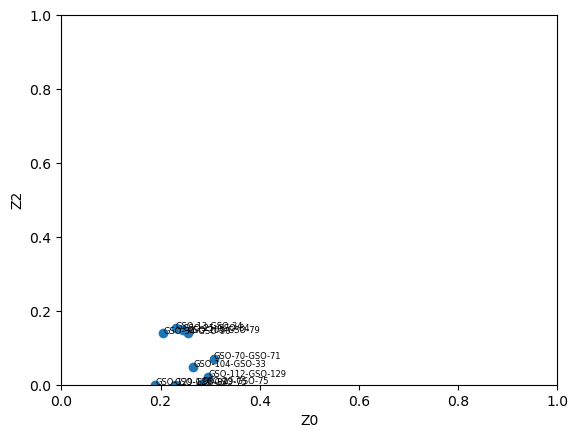

In [87]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Hacer un gráfico de dispersión de 'Z2' vs 'Z0'
ax.scatter(filtered_IBD['Z0'], filtered_IBD['Z2'])

# Etiquetar cada punto con el valor de 'PAIR'
for i, txt in enumerate(filtered_IBD['PAIR']):
    ax.annotate(txt, (filtered_IBD['Z0'].iloc[i], filtered_IBD['Z2'].iloc[i]), fontsize=6)

# Establecer los límites de los ejes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Establecer los títulos de los ejes
ax.set_xlabel('Z0')
ax.set_ylabel('Z2')

# Mostrar el gráfico
plt.show()

# Lets analyze an specific case

In [88]:
from itertools import combinations

# Definir la lista de individuos
individuals = ['GSO-129', 'GSO-84', 'GSO-75', 'GSO-29', 'GSO-112', "GSO-95"]

# Crear una lista de todos los pares posibles
pairs = list(combinations(individuals, 2))

# Inicializar un dataframe vacío para almacenar los resultados
filtered_IBD = pd.DataFrame()

# Buscar cada par en IBD y agregar los resultados a filtered_IBD
for iid1, iid2 in pairs:
    pair_in_IBD = IBD[((IBD['IID1'] == iid1) & (IBD['IID2'] == iid2)) | ((IBD['IID1'] == iid2) & (IBD['IID2'] == iid1))]
    filtered_IBD = pd.concat([filtered_IBD, pair_in_IBD])

In [89]:
filtered_IBD

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,PAIR
123,0,GSO-129,0,GSO-84,OT,0,0.1891,0.8109,0.0000,0.4054,-1,0.794926,0.9498,6.5000,GSO-129-GSO-84
157,0,GSO-129,0,GSO-75,OT,0,0.2283,0.7717,0.0000,0.3858,-1,0.788009,0.9498,6.5000,GSO-129-GSO-75
163,0,GSO-129,0,GSO-29,OT,0,0.5615,0.4223,0.0161,0.2273,-1,0.762742,0.2919,1.5000,GSO-129-GSO-29
138,0,GSO-129,0,GSO-112,OT,0,0.2960,0.6819,0.0221,0.3630,-1,0.793024,0.5000,2.0000,GSO-112-GSO-129
165,0,GSO-129,0,GSO-95,OT,0,0.4174,0.5826,0.0000,0.2913,-1,0.766814,0.4251,1.8000,GSO-129-GSO-95
2007,0,GSO-84,0,GSO-75,OT,0,0.5474,0.4521,0.0005,0.2265,-1,0.761502,0.2919,1.5000,GSO-75-GSO-84
2013,0,GSO-84,0,GSO-29,OT,0,0.6429,0.3555,0.0016,0.1794,-1,0.751199,0.5000,2.0000,GSO-29-GSO-84
1988,0,GSO-84,0,GSO-112,OT,0,0.7153,0.2847,0.0000,0.1424,-1,0.719059,0.7081,2.7500,GSO-112-GSO-84
2015,0,GSO-84,0,GSO-95,OT,0,0.3342,0.6658,0.0000,0.3329,-1,0.758588,0.0031,0.5000,GSO-84-GSO-95
4240,0,GSO-75,0,GSO-29,OT,0,0.2816,0.7156,0.0028,0.3606,-1,0.791168,0.9498,6.5000,GSO-29-GSO-75


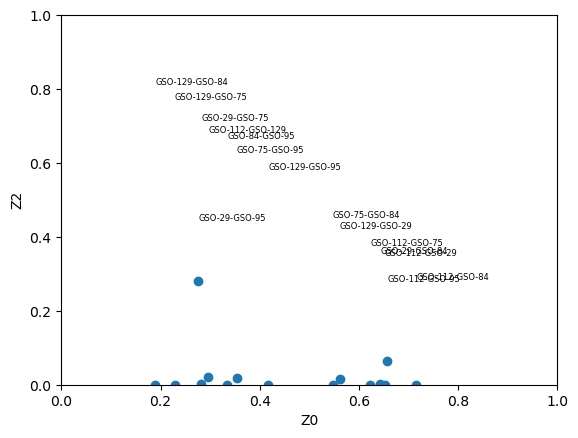

In [52]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Hacer un gráfico de dispersión de 'Z2' vs 'Z0'
ax.scatter(filtered_IBD['Z0'], filtered_IBD['Z2'])

# Etiquetar cada punto con el valor de 'PAIR'
for i, txt in enumerate(filtered_IBD['PAIR']):
    ax.annotate(txt, (filtered_IBD['Z0'].iloc[i], filtered_IBD['Z1'].iloc[i]), fontsize=6)

# Establecer los límites de los ejes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Establecer los títulos de los ejes
ax.set_xlabel('Z0')
ax.set_ylabel('Z2')

# Mostrar el gráfico
plt.show()

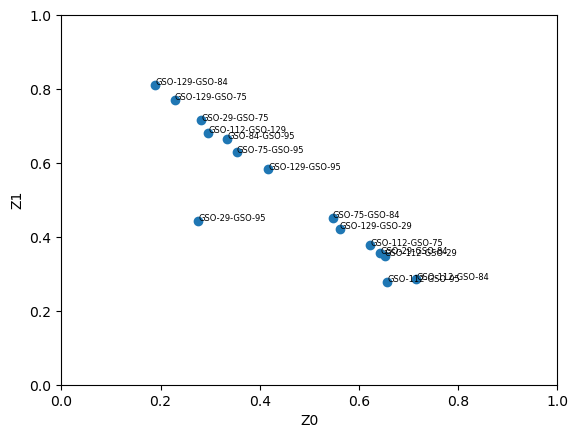

In [53]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Hacer un gráfico de dispersión de 'Z2' vs 'Z0'
ax.scatter(filtered_IBD['Z0'], filtered_IBD['Z1'])

# Etiquetar cada punto con el valor de 'PAIR'
for i, txt in enumerate(filtered_IBD['PAIR']):
    ax.annotate(txt, (filtered_IBD['Z0'].iloc[i], filtered_IBD['Z1'].iloc[i]), fontsize=6)

# Establecer los límites de los ejes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Establecer los títulos de los ejes
ax.set_xlabel('Z0')
ax.set_ylabel('Z1')

# Mostrar el gráfico
plt.show()

## Metadata
- GSO-129-b is one of the oldest (8.2 years), he is male. Colony LC.
- GSO-84-m other of the oldest (7.5 years), she is female. Colony LC.
- GSO-112-n, she is 6.8 years old, female. Colony LC.
- GSO-75-d, she is 7.5 years old, female. Colony LC.
- GSO-29-m, she is 4.6 years old, female. Colony LC.
- GSO-95-p, she is 5.4 years old, female. Colony LC

# The other group

In [54]:
from itertools import combinations

# Definir la lista de individuos
individuals = ['GSO-53', 'GSO-23', 'GSO-12', 'GSO-31', 'GSO-99']

# Crear una lista de todos los pares posibles
pairs = list(combinations(individuals, 2))

# Inicializar un dataframe vacío para almacenar los resultados
filtered_IBD = pd.DataFrame()

# Buscar cada par en IBD y agregar los resultados a filtered_IBD
for iid1, iid2 in pairs:
    pair_in_IBD = IBD[((IBD['IID1'] == iid1) & (IBD['IID2'] == iid2)) | ((IBD['IID1'] == iid2) & (IBD['IID2'] == iid1))]
    filtered_IBD = pd.concat([filtered_IBD, pair_in_IBD])

In [61]:
filtered_IBD.sort_values(by='PI_HAT', ascending=False)

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO,PAIR
4495,0,GSO-23,0,GSO-53,OT,0,0.4117,0.2927,0.2956,0.4420,-1,0.829074,0.0005,0.3636,GSO-23-GSO-53
4478,0,GSO-23,0,GSO-31,OT,0,0.5411,0.1546,0.3043,0.3816,-1,0.816382,0.0001,0.2500,GSO-23-GSO-31
4494,0,GSO-23,0,GSO-12,OT,0,0.4767,0.3902,0.1331,0.3282,-1,0.792941,0.0929,1.0000,GSO-12-GSO-23
4511,0,GSO-23,0,GSO-99,OT,0,0.5784,0.2439,0.1777,0.2996,-1,0.789689,0.0294,0.7500,GSO-23-GSO-99
5270,0,GSO-12,0,GSO-53,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.717427,0.1367,1.1429,GSO-12-GSO-53
4846,0,GSO-31,0,GSO-53,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.723769,0.0502,0.8750,GSO-31-GSO-53
5304,0,GSO-53,0,GSO-99,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.726193,0.2919,1.5000,GSO-53-GSO-99
4845,0,GSO-31,0,GSO-12,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.689315,0.0031,0.5000,GSO-12-GSO-31
5286,0,GSO-12,0,GSO-99,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.728024,0.5000,2.0000,GSO-12-GSO-99
4862,0,GSO-31,0,GSO-99,OT,0,1.0000,0.0000,0.0000,0.0000,-1,0.701118,0.5000,2.0000,GSO-31-GSO-99


In [73]:
from itertools import combinations

# Definir la lista de individuos
individuals = ['GSO-53', 'GSO-23', 'GSO-12', 'GSO-31', 'GSO-99']

# Crear una lista de todos los pares posibles
pairs = list(combinations(individuals, 2))

# Inicializar un dataframe vacío para almacenar los resultados
filtered_kinship = pd.DataFrame()

# Buscar cada par en IBDKinship y agregar los resultados a filtered_IBD
for iid1, iid2 in pairs:
    pair_in_kinship = kinship[((kinship['IID1'] == iid1) & (kinship['IID2'] == iid2)) | ((kinship['IID1'] == iid2) & (kinship['IID2'] == iid1))]
    filtered_kinship = pd.concat([filtered_kinship, pair_in_kinship])

In [75]:
filtered_kinship.sort_values(by='KINSHIP', ascending=False)

,#FID1,IID1,FID2,IID2,NSNP,HETHET,IBS0,KINSHIP,PAIR
3715,0,GSO-53,0,GSO-23,5087,0.245135,0.028111,0.231147,GSO-23-GSO-53
3630,0,GSO-12,0,GSO-23,5100,0.196275,0.032549,0.173959,GSO-12-GSO-23
2406,0,GSO-31,0,GSO-23,4926,0.206456,0.036947,0.168548,GSO-23-GSO-31
5211,0,GSO-99,0,GSO-23,5140,0.211673,0.039494,0.164577,GSO-23-GSO-99
5237,0,GSO-99,0,GSO-53,21643,0.130573,0.068752,-0.015936,GSO-53-GSO-99
5236,0,GSO-99,0,GSO-12,21660,0.142151,0.072668,-0.018475,GSO-12-GSO-99
3740,0,GSO-53,0,GSO-12,21582,0.134093,0.071819,-0.022082,GSO-12-GSO-53
3724,0,GSO-53,0,GSO-31,21292,0.122628,0.087169,-0.139463,GSO-31-GSO-53
5220,0,GSO-99,0,GSO-31,21368,0.109229,0.100290,-0.202710,GSO-31-GSO-99
3639,0,GSO-12,0,GSO-31,21311,0.113463,0.106565,-0.234390,GSO-12-GSO-31


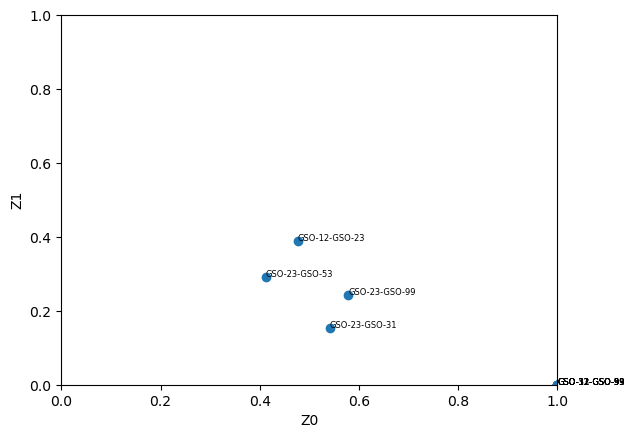

In [56]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Hacer un gráfico de dispersión de 'Z2' vs 'Z0'
ax.scatter(filtered_IBD['Z0'], filtered_IBD['Z1'])

# Etiquetar cada punto con el valor de 'PAIR'
for i, txt in enumerate(filtered_IBD['PAIR']):
    ax.annotate(txt, (filtered_IBD['Z0'].iloc[i], filtered_IBD['Z1'].iloc[i]), fontsize=6)

# Establecer los límites de los ejes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Establecer los títulos de los ejes
ax.set_xlabel('Z0')
ax.set_ylabel('Z1')

# Mostrar el gráfico
plt.show()